In [2]:
###Tutorial Overview
## 1.Scaling Data
## 2.Robus Scalar Transforms
## 3. IQR Robust Scaler
## 4. Explore robust scaler range
## Robust scaling data =  (value - median)/(IQR)  ##IQR = 75th - 25th percentiles

### Robust Scalar Transformation

(768, 9)
                0           1           2           3           4           5           6           7           8
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000  

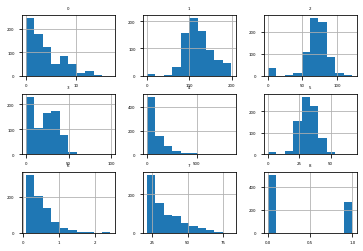

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

dataset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)

print(dataset.shape)

print(dataset.describe())

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

model = KNeighborsClassifier()

X,y = dataset.values[:,:-1],dataset.values[:,-1]

print(X.shape)
y = LabelEncoder().fit_transform(y.astype('str'))

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

n_scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv,n_jobs=-1)

#report accurayc
print("Accuracy : %.3f (%.3f)"%(np.mean(n_scores),np.std(n_scores)))


(768, 8)
Accuracy : 0.717 (0.040)


#### IQR Robust Scale Transformation

(768, 9)
                0           1           2           3           4           5           6           7           8
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798    0.259807    0.249464    0.348958
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759    0.866219    0.691778    0.476951
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   -0.769935   -0.470588    0.000000
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   -0.336601   -0.294118    0.000000
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624    0.663399    0.705882    1.000000
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194  

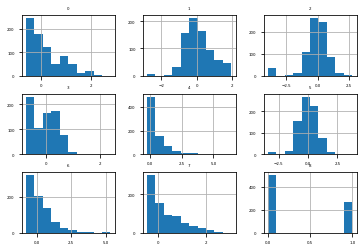

In [10]:
from sklearn.preprocessing import RobustScaler

dataset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)

print(dataset.shape)



data = dataset.values

scaler = RobustScaler()

data = scaler.fit_transform(data)

dataset = pd.DataFrame(data)

print(dataset.describe())
fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [11]:
### Evaluating using KNN model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.pipeline import Pipeline
model = KNeighborsClassifier()


data = dataset.values

scaler = RobustScaler()


X,y = dataset.values[:,:-1],dataset.values[:,-1]

print(X.shape)
y = LabelEncoder().fit_transform(y.astype('str'))


pipeline = Pipeline([('tr',scaler),('knn',model)])
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

n_scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=-1)

#report accurayc
print("Accuracy : %.3f (%.3f)"%(np.mean(n_scores),np.std(n_scores)))


(768, 8)
Accuracy : 0.734 (0.044)


#### Explore robust scaler range

>1 Accuracy :0.734 (0.054)
>5 Accuracy :0.736 (0.051)
>10 Accuracy :0.739 (0.047)
>15 Accuracy :0.740 (0.045)
>20 Accuracy :0.734 (0.050)
>25 Accuracy :0.734 (0.044)
>30 Accuracy :0.735 (0.042)


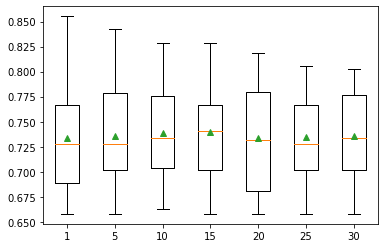

In [13]:

def get_dataset():
    datset = pd.read_csv('../dataset/pima-indians-diabetes.csv',header=None)
    
    data = dataset.values
    
    X = data[:,:-1]
    y = data[:,-1]
    y = LabelEncoder().fit_transform(y.astype('str'))
    
    return X,y

def get_models():
    models = {}
    
    for value in [1,5,10,15,20,25,30]:
        scaler = RobustScaler(quantile_range=(value,100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline([('scr',scaler),('mdl',model)])
    
    return models

#Evaluate given model

def evaluate_model (model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
    
    return n_scores

X,y = get_dataset()

models = get_models()

results,names = [],[]

for name,model in models.items():
    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s Accuracy :%.3f (%.3f)'%(name,np.mean(scores),np.std(scores)))

plt.boxplot(results,labels=names,showmeans=True)
plt.show()